# 7 支持向量机

### 线性可分

定义: 对于一组数据 $(x_i,y_i)\in\mathbb R^{p}\times \mathbb R\ (i=1,\dotsc,n)$, 若存在系数 $w\in\mathbb R^p, \ b\in\mathbb R$ 使得
$$y_i(w^Tx_i + b_i)>0\quad (i=1,\dotsc,n).$$

那么称这组数据是线性可分 (lineary separable) 的.


<br>

可以看出, 若该组数据是线性可分的, 则
$$\left\{\begin{aligned}y_i > 0,&\quad 若\  w^Tx_i+b>0\\ y_i < 0,&\quad 若 \ w^Tx_i+b<0
\end{aligned}\right.$$

也就是说, 可以用函数 $f(x) =w^Tx+b$ 对 $y$ 进行二分类. 这就是支持向量机 (support vector machine, SVM).

## 间隔最大化

若数据是可分的, 可以通过如下优化问题得到 $w,b$:
$${\rm argmax}_{w,b}\left\{\min_{1\leqslant i\leqslant n} \{y_i\left(\frac{w^T}{\Vert w\Vert}x_i + \frac{b}{\Vert w\Vert}\right)\} \right\}\quad\quad\quad (1)$$

称为间隔 (margin) 最大化.

### 凸优化

**定理** 若数据是可分的, 通过下式 (2) 求得的 $w,b$ 是上面式子 (1) 的一个最大值点.

 注意: $f(x) = w^Tx+b$ 中, 将 $w,b$ 同乘一个正数不改变预测结果 $f(x)$ 的正负号. 所以是等价的.

$$\min\left\{\frac{1}{2}\Vert w\Vert^2:\quad{\rm s.t.}\ y_i(w^Tx_i+b)\geqslant 1 \quad (i=1,\dotsc,n)\right\}\quad\quad\quad (2)$$

**证明** 首先说明该式 (2) 存在且有唯一最小值: 由于数据可分, 存在 $w,b$ 使得 $y_i(w^Tx_i+b)>0$ 对所有 $i$ 成立, 因此可以将 $w,b$ 同乘一个倍数使得  $y_i(w^Tx_i+b)> 1$ 对所有 $i$ 成立. 因此式 (2) 条件的解集不为空集, 且它是凸优化且存在有限下界且满足 Slater 条件, 因此存在唯一最小值点.

假设 (2) 最小值点是 $w,b$. 反证, 假设存在 $w',b'$ 使得

$$\min_{1\leqslant i\leqslant n} \{y_i\left(\frac{w'^T}{\Vert w'\Vert}x_i + \frac{b'}{\Vert w'\Vert}\right)\}
>\min_{1\leqslant i\leqslant n} \{y_i\left(\frac{w^T}{\Vert w\Vert}x_i + \frac{b}{\Vert w\Vert}\right)\}\geqslant \frac{1}{\Vert w\Vert},
$$

设 $r=\left( \min_{1\leqslant i\leqslant n} \{y_i\left(\frac{w'^T}{\Vert w'\Vert}x_i + \frac{b'}{\Vert w'\Vert}\right)\}\right)^{-1}$, 则 $r<\Vert w\Vert $. 那么取 $w'' = w'\frac{r}{\Vert w'\Vert}$ 和 $b'' = b'\frac{r}{\Vert w''\Vert}$, 则 $w'',b''$ 满足
$$y_i(w''^Tx_i + b'') = y_i(w'^Tx_i + b')\frac{r}{\Vert w'\Vert}= \frac{y_i(w'^Tx_i + b')}{\Vert w'\Vert}\cdot\frac{1}{\min_{1\leqslant i\leqslant n} \{y_i\left(\frac{w'^T}{\Vert w'\Vert}x_i + \frac{b'}{\Vert w'\Vert}\right)\}}\geqslant 1,$$

且 

$$\Vert w''\Vert = r\leqslant \Vert w\Vert\quad\Rightarrow\quad \frac 12\Vert w''\Vert^2\leqslant \frac 12\Vert w\Vert^2.$$

说明 $(w'',b'')$ 能使 (2) 达到更小的值, 矛盾.


### 拉格朗日对偶

(2) 式可以通过拉格朗日对偶求解, $w =\sum_{i=1}^n \lambda_i y_i x_i $, 其中 $\lambda_i$ 为下式的极小值点:
$$\inf_{\lambda\geqslant 0}\left\{\frac 12\sum_{i=1}^n \sum_{j=1}^n \lambda_i\lambda_jy_iy_j\langle x_i,x_j\rangle -\sum_{i=1}^n \lambda_i\quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0 \right\}$$

**证明** 拉格朗日对偶为 
$$\begin{aligned}\sup_{\lambda\geqslant 0}\inf_{w,b}\left\{\frac 12 \Vert w\Vert^2 -\sum_{i=1}^n\lambda_i (y_i(w^Tx_i + b) - 1)\right\}
&=\sup_{\lambda\geqslant 0}\inf_w\left\{\frac 12\Vert w\Vert^2 - w^T\sum_{i=1}^n \lambda_i y_i x_i+\sum_{i=1}^n \lambda_i \quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0\right\}
\\ &= \sup_{\lambda\geqslant 0}\left\{-\frac 12\left\Vert\sum_{i=1}^n \lambda_i y_i x_i\right\Vert^2 +\sum_{i=1}^n \lambda_i\quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0 \right\}
\\ &= \inf_{\lambda\geqslant 0}\left\{\frac 12\sum_{i=1}^n \sum_{j=1}^n \lambda_i\lambda_jy_iy_j\langle x_i,x_j\rangle -\sum_{i=1}^n \lambda_i\quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0 \right\}
\end{aligned}$$

## 软间隔

因为不一定存在那样的 $w,b$, 即数据不可分的情形. 可以先任意给定常数 $C>0$, 采用如下软间隔 (soft margin):

$$\min\left\{\frac{1}{2}\Vert w\Vert^2+C\sum_{i=1}^n \xi_i:\quad{\rm s.t.}\ y_i(w^Tx_i+b)\geqslant 1-\xi_i,\ \ \xi_i \geqslant 0 \quad (i=1,\dotsc,n)\right\}\quad\quad\quad (3)$$

可见软间隔 (3) 式相比 (2) 式, 允许 $y_i(w^Tx_i+b)$ 比 $1$ 稍小. 但不应小太多, 否则会使得 $\frac{1}{2}\Vert w\Vert^2+C\sum_{i=1}^n \xi_i$ 变大.

Quadratic Program
  minimize 0.5·‖w‖² + 100·⟨ones, r⟩
  over
    3×1 real variable w
    100×1 real variable r (bounded below)
  subject to
    y⊙(X·w) + r ≥ ones


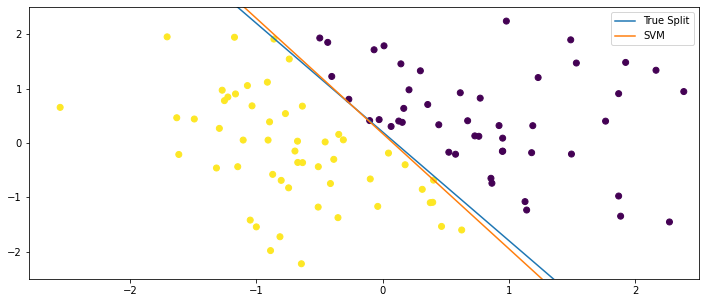

In [14]:
import numpy as np
import picos
class SVM():
    def __init__(self) -> None:
        self.w = None

    def fit(self, X, y, C = 10.):
        n, p = X.shape[0], X.shape[1] + 1
        X = np.hstack((np.ones((n, 1)), X)) # add interception term
        X = picos.Constant('X', X)
        if y.dtype == np.bool_: y = np.where(y, 1, -1)
        y = picos.Constant('y', y.astype('float'))
        ones = picos.Constant('ones', np.ones(n))

        _svm = picos.Problem()
        w = picos.RealVariable('w', (p, 1))
        relax = picos.RealVariable('r', (n, 1), lower = 0)
        _svm.add_constraint((y ^ (X * w)) + relax >= ones) # ^ is Hadmard product
        _svm.minimize = .5 * (w|w) + C * (ones|relax)
        print(_svm)
        _svm.solve()
        
        self.w = np.array(w.value)
        
    def __call__(self, X):
        return ((np.hstack((np.ones((X.shape[0], 1)), X)) @ self.w) > 0).flatten() 

from matplotlib import pyplot as plt
np.random.seed(0)
data = np.random.randn(100, 2)
real_coeffs = np.array([-.2, 2, 1])
labels = data @ real_coeffs[1:] + real_coeffs[0] < 0
svm = SVM()
svm.fit(data, labels, C = 100.)

plt.figure(figsize = (12, 5))
plt.scatter(data[:,0], data[:,1], c = labels)
plt.xlim(-2.8, 2.5)
plt.ylim(-2.5, 2.5)
def draw_line(w, **kwargs):
    l = 100
    plt.plot([-l, l], [-(w[0] + w[1] * (-l))/w[2], -(w[0] + w[1] * (l))/w[2]])
draw_line(real_coeffs)
draw_line(svm.w)
plt.legend(['True Split', 'SVM'])
plt.show()

Quadratic Program
  minimize 0.5·‖w‖² + 2·⟨ones, r⟩
  over
    3×1 real variable w
    100×1 real variable r (bounded below)
  subject to
    y⊙(X·w) + r ≥ ones


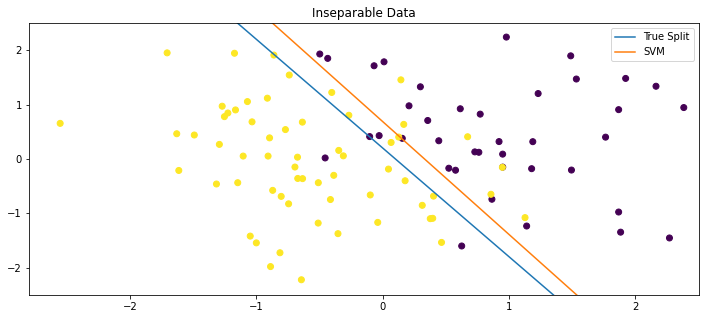

In [15]:
# inseparable data
np.random.seed(0)
data = np.random.randn(100, 2)
real_coeffs = np.array([-.2, 2, 1])
labels = data @ real_coeffs[1:] + real_coeffs[0] + np.random.randn(data.shape[0]) < 0
svm = SVM()
svm.fit(data, labels, C = 2.)

plt.figure(figsize = (12, 5))
plt.scatter(data[:,0], data[:,1], c = labels)
plt.xlim(-2.8, 2.5)
plt.ylim(-2.5, 2.5)
def draw_line(w, **kwargs):
    l = 100
    plt.plot([-l, l], [-(w[0] + w[1] * (-l))/w[2], -(w[0] + w[1] * (l))/w[2]])
draw_line(real_coeffs)
draw_line(svm.w)
plt.legend(['True Split', 'SVM'])
plt.title('Inseparable Data')
plt.show()

### 拉格朗日对偶

软间隔 (3) 式可以通过拉格朗日对偶求解, $w =\sum_{i=1}^n \lambda_i y_i x_i $, 其中 $\lambda_i$ 为下式的极小值点:
$$\inf_{0\leqslant \lambda_i\leqslant C}\left\{\frac 12\sum_{i=1}^n \sum_{j=1}^n \lambda_i\lambda_jy_iy_j\langle x_i,x_j\rangle -\sum_{i=1}^n \lambda_i\quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0 \right\}$$

注: 与间隔最大化 (2) 式的拉格朗日对偶相比, 区别在于要求 $0\leqslant \lambda_i\leqslant C$ 而不止是 $0\leqslant \lambda_i$.

该拉格朗日对偶问题省去了 $p$ 个变量 ($p$ 为数据维数). 经测试, 相比原问题, 当 $p$ 不太小时 (如 $ p > 10$) <font color=red>改为求解拉格朗日对偶能有效降低时间复杂度.</font>

Quadratic Program
  minimize 0.5·‖Xᵀ·a‖² - ⟨a, ones⟩
  over
    100×1 real variable a (clamped)
  subject to
    ⟨a, y⟩ = 0


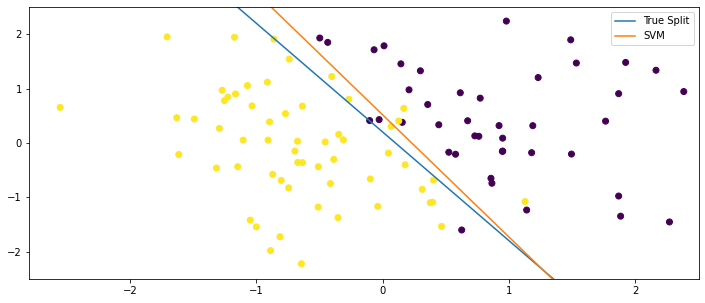

In [12]:
import numpy as np
import picos
class SVM_dual():
    def __init__(self) -> None:
        self.w = None

    def fit(self, X, y, C = 10.):
        n, p = X.shape[0], X.shape[1] + 1
        y_ = np.where(y, 1, -1).astype('float')
        X_ = picos.Constant('X', X * y_.reshape((-1, 1)))
        ones = picos.Constant('ones', np.ones(n))
        y_ = picos.Constant('y', y_)

        _svm = picos.Problem()
        a = picos.RealVariable('a', (n, 1), lower = 0, upper = C)
        _svm.add_constraint((a|y_) == 0)
        _svm.minimize = .5 * abs(X_.T * a) ** 2 - (a|ones)
        print(_svm)
        _svm.solve()
        
        self.w = (np.array(a.value) * np.array(X_.value)).sum(axis = 0)
        self.compute_b(X @ self.w, y)
        
    def compute_b(self, r, y):
        """Compute the interception in O(nlnn) after solving dual problem."""
        # y(r + b) >= 1 - \xi
        r = np.where(y, r - 1, r + 1)
        sorts = np.argsort(r)
        r, y = r[sorts], y[sorts]
        pos_num, pos_r = np.cumsum(y), np.cumsum(y * r)
        neg_num, neg_r = np.cumsum(y ^ 1), np.cumsum((y ^ 1) * r)
        neg_num, neg_r = neg_num[-1] - neg_num, neg_r[-1] - neg_r
        goal = (neg_num - pos_num) * (-r) + neg_r - pos_r
        self.b = -r[np.argmin(goal)]

    def __call__(self, X, return_margin = False):
        margin = ((X @ self.w + self.b)).flatten()
        return margin if return_margin else margin > 0

    def coeffs(self):
        return np.concatenate([np.array([self.b]), self.w])


from matplotlib import pyplot as plt
np.random.seed(0)
data = np.random.randn(100, 2)
real_coeffs = np.array([-.2, 2, 1])
labels = data @ real_coeffs[1:] + real_coeffs[0] + np.random.randn(data.shape[0]) * .5 < 0
svm = SVM_dual()
svm.fit(data, labels, C = .1)

plt.figure(figsize = (12, 5))
plt.scatter(data[:,0], data[:,1], c = labels)
plt.xlim(-2.8, 2.5)
plt.ylim(-2.5, 2.5)
def draw_line(w, **kwargs):
    l = 100
    plt.plot([-l, l], [-(w[0] + w[1] * (-l))/w[2], -(w[0] + w[1] * (l))/w[2]])
draw_line(real_coeffs)
draw_line(svm.coeffs())
plt.legend(['True Split', 'SVM'])
plt.show()

## 核技巧

如果数据 $(x_i,y_i)\in\mathbb R^p\times \mathbb R$ 线性不可分, 也可以先进行变换 $x_i\mapsto z_i\in\mathbb R^q$, 变成新的数据 $(z_i,y_i)\in\mathbb R^q\times \mathbb R$, 也许新的数据就能线性可分了.

设这个变换为 $\phi(x) = z$. 定义该变换对应的核函数为:
$$K(x_1,x_2) = \phi(x_1)^T\phi(x_2)\quad\quad x_1,x_2\in\mathbb R^p.$$

### 核函数

经过变换后, 相应的拉格朗日对偶为求解 $w = \sum \lambda_i y_i\phi(x_i)$ 其中 $\lambda_i$ 来自

$$\inf_{0\leqslant \lambda_i\leqslant C}\left\{\frac 12\sum_{i=1}^n \sum_{j=1}^n \lambda_i\lambda_jy_iy_jK( x_i,x_j) -\sum_{i=1}^n \lambda_i\quad{\rm\ s.t.\ }  \sum_{i=1}^n \lambda_i y_i=0 \right\}$$

最终的分类准则为

$$f(x) = {\rm sgn}\left\{w^T\phi^T(x)+b\right\}
={\rm sgn}\left\{\sum_{i=1}^n \lambda_i y_i\phi^T(x)\phi(x_i)+b\right\}
={\rm sgn}\left\{\sum_{i=1}^n \lambda_i y_iK(x,x_i)+b\right\}$$

由于 $\phi$ 被消掉了, 只需要用到 $K$, 所以可以直接选取 $K$.


### 正定性

若跳过 $\phi$ 直接选取 $K$, 需要满足一定条件, 因为不是所有的二元函数 $K(x,y)$ 都存在 $\phi$ 使得 $K(x_1,x_2) = \phi^T(x_1)\phi(x_2)$.

**定理** 若存在 $\phi$ 使得 $K(x_1,x_2) = \phi^T(x_1)\phi(x_2)$, 则对于任意若干 $x_1,\dotsc,x_m\in\mathbb R^p$, 矩阵 $[K(x_i,x_j)]_{ij}\in \mathbb R^{m\times m}$ 是半正定的.

<br>

该定理是显然的. 另外, 其逆命题也成立: 若对于任意若干 $x_1,\dotsc,x_m\in\mathbb R^p$, 矩阵 $[K(x_i,x_j)]_{ij}$ 都是半正定的, 则存在那样的 $\phi$ 使得 $K(x_1,x_2) = \phi^T(x_1)\phi(x_2)$.

这样的核函数也称为正定核 (positive definite kernel function).

<br>


**定理** 两个正定核函数相加或相乘还是正定核.

**证明** 只需证明, 两个半正定矩阵 $A,B\in\mathcal S_+^{m}$ 相加或哈达玛积仍然是半正定的. 证明: 对于相加, 任取向量 $v$, 则二次型
$$v^T(A+B)v=v^TAv+v^TBv\geqslant 0\quad\Rightarrow\quad A+B\succeq 0.$$

对于哈达玛积: 引理: 对于任意向量 $u_1,v_1,u_2,v_2\in\mathbb R^m$, 有 $(u_1u_2^T)\odot (v_1v_2^T) = (u_1\odot v_1)(u_2\odot v_2)^T$. 引理证略. 回到原题, 设 $A,B$ 有谱分解 $A = \sum_i \lambda_i u_iu_i^T$, $B = \sum_j \mu_j  v_jv_j^T$, 其中 $\lambda_i,\mu_j\geqslant 0$ 为特征值且 $u_i$, $v_j$ 分别为特征向量. 于是

$$(A\odot B) = \sum_{i=1}^m \sum_{j=1}^m \lambda_i \mu_j (u_iu_i^T)\odot (v_jv_j^T)
= \sum_{i=1}^m \sum_{j=1}^m \lambda_i \mu_j (u_iv_j)\odot (u_iv_j)^T
$$
它是 $m^2$ 个半正定矩阵相加, 因此也是半正定的.


### 常用核函数


多项式核函数: $K(x_1,x_2) = (\langle x_1,x_2\rangle + 1)^p$

高斯核函数: $K(x_1,x_2) = \exp\left\{-\frac{\Vert x_1 - x_2\Vert^2}{2\sigma^2}\right\}$